<a href="https://colab.research.google.com/github/ihagoSantos/natural-language-processing/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimentos
A extração de sentimentos do consumidor, do usuário, do leitor ou do publico em geral a partir de textos recebidos

In [1]:
# Instalação de pacotes necessários
!pip install nltk==3.8.1
!pip install scikit-learn==1.5.2
!pip install vaderSentiment==3.3.2
!pip install unidecode==1.3.8
!pip install seaborn==0.13.1
!pip install textblob==0.17.1
!pip install pandas==2.2.2
!pip install transformers==4.38.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 56.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully unin

In [2]:
# Importa módulos essenciais para funcionalidades do notebook
import datetime
import os
import re
import requests
import string
import sys

# Importação de bibliotecas de terceiros
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
import transformers
from unidecode import unidecode
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Downloads NLTK
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
def preprocessa_texto(texto):
  """
  Preprocessa o texto fornecido realizando várias etapas de limpeza

  Etapas:
  1. Tokeniza o texto
  2. Converte os tokens para minusculo
  3. Remove stopwords em português
  4. Remove números dos tokens
  5. Exclui tokens que são pontuações
  6. Remove acentuações dos tokens

  Parâmetros:
  texto (str): O texto a ser preprocessado

  Retorna:
  list: Lista de tokens preprocessados
  """

  # Tokeniza o texto usando um padrão para capturar palavras e pontuações.
  padrao = r"\w+(?:'\w+)?|[^\w\s]"
  tokens_preprocessados = re.findall(padrao, texto)

  # Converte o texto para minúsculo para padronizar a capitalização
  tokens_preprocessados = [token.lower() for token in tokens_preprocessados]

  # Remove stopwords para reduzir o conjunto de tokens a palavras significativas
  portugues_stops = stopwords.words('portuguese')
  tokens_preprocessados = [token for token in tokens_preprocessados if token not in portugues_stops]

  # Remove números, pois geralmente não contribuem para o significado do texto
  tokens_preprocessados = [re.sub(r'\d+', '', token) for token in tokens_preprocessados if re.sub(r'\d+', '', token)]

  # Exclui tokens que são pontuações, pois raramente são úteis par análise de texto
  tokens_preprocessados = [token for token in tokens_preprocessados if token not in string.punctuation]

  # Remove acentuações para padronizar os tokens
  tokens_preprocessados = [unidecode(token) for token in tokens_preprocessados]

  return ' '.join(tokens_preprocessados)

In [4]:
# coleta dados da url passada como parâmetro
url = (
    "https://raw.githubusercontent.com/gomesluiz/"
    "pln-na-pratica/main/datasets/financial_sentiment.csv"
)

sentimentos = pd.read_csv(url)
sentimentos.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


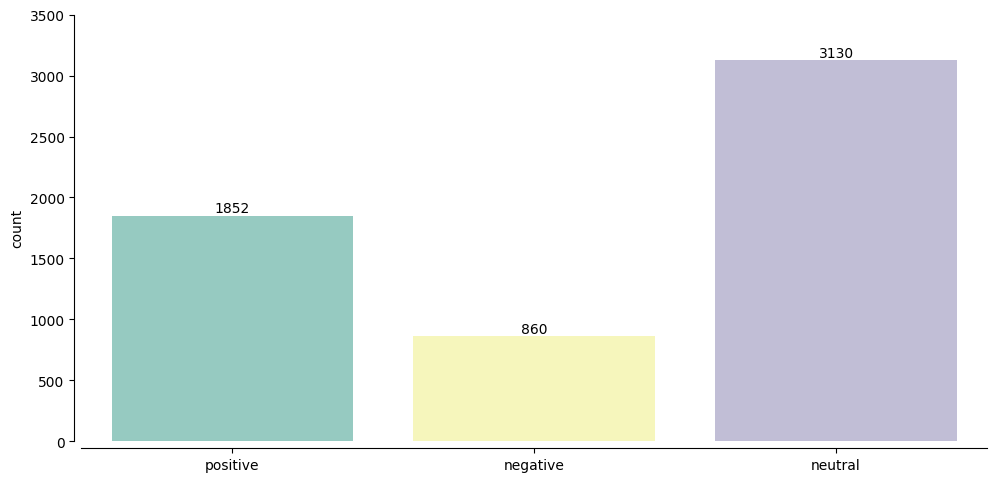

In [5]:
# Plota o gráfico de categorias dos sentimentos
g=sns.catplot(
    data=sentimentos,
    x="Sentiment",
    height=5,
    aspect=2,
    kind="count",
    palette="Set3",
    hue="Sentiment",
    legend=False
)

for ax in g.axes.flat:
  for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge")

sns.despine(offset=5)

g.set(ylim=(0, 3500))
g.set(xlabel=None)

# Aprendizado de Máquina

In [6]:
# Preprocessa coluna de sentenças
sentimentos['Preprocessed_Sentence'] = sentimentos['Sentence'].apply(preprocessa_texto)
sentimentos.head()

,Sentence,Sentiment,Preprocessed_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,the last quarter of componenta s net sales dou...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [7]:
# Divide o dataset de trechos de textos em treino e teste
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(sentimentos['Preprocessed_Sentence'], sentimentos['Sentiment'], test_size=.25, random_state=32)


In [8]:
# Vetoriza conjunto de treinamento
vetorizador = CountVectorizer(max_features=1000)
X_train_vetorizado = vetorizador.fit_transform(X_train)
X_train_vetorizado = pd.DataFrame(X_train_vetorizado.toarray(), columns=vetorizador.get_feature_names_out())
X_train_vetorizado.index = X_train_vetorizado.index
X_train_vetorizado.head()

,aapl,ab,able,about,above,access,according,acquire,acquired,acquisition,...,www,xac,year,years,yesterday,yet,yhoo,yit,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Vetoriza conjunto de teste
X_test_vetorizado = vetorizador.transform(X_test) # Aproveita o mesmo vocabulário do conjunto de treinamento
X_test_vetorizado = pd.DataFrame(X_test_vetorizado.toarray(), columns=vetorizador.get_feature_names_out())
X_test_vetorizado.index = X_test_vetorizado.index
X_test_vetorizado.head()

,aapl,ab,able,about,above,access,according,acquire,acquired,acquisition,...,www,xac,year,years,yesterday,yet,yhoo,yit,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
# Treina modelo de predição de sentimento
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
_ = clf.fit(X_train_vetorizado, y_train)
print("Modelo baseline treinado")

Modelo baseline treinado


In [11]:
# Testa o modelo
y_pred = clf.predict(X_test_vetorizado)
print("Modelo baseline testado")

Modelo baseline testado


In [12]:
# Calcula a acurácia do modelo
from sklearn import metrics
acc = metrics.accuracy_score(y_pred, y_test)
print(f"Acurácia:\n{acc}")

Acurácia:
0.6865160848733745


# Text Blob

TextBlob é uma biblioteca Python para processamento de dados textuais. Ele fornece uma API simples para taferas comuns de processamento de linguagem natural (PLN) como análises de sentimentos.

In [18]:
# Determina a polaridade do texto
texto_1 = sentimentos.iloc[0]['Sentence'] # Sentimento Positivo
texto_2 = sentimentos.iloc[1]['Sentence'] # Sentimento Negativo
texto_3 = sentimentos.iloc[3]['Sentence'] # Sentimento Neutro

p_1 = TextBlob(texto_1).sentiment.polarity
p_2 = TextBlob(texto_2).sentiment.polarity
p_3 = TextBlob(texto_3).sentiment.polarity

print(f"Texto 1: {texto_1}\nPolaridade 1: {p_1}\n")
print(f"Texto 2: {texto_2}\nPolaridade 2: {p_2}\n")
print(f"Texto 3: {texto_3}\nPolaridade 3: {p_3}\n")

Texto 1: The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .
Polaridade 1: 0.2090909090909091

Texto 2: $ESI on lows, down $1.50 to $2.50 BK a real possibility
Polaridade 2: 0.022222222222222213

Texto 3: According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .
Polaridade 3: 0.0625



# Vader
Vader (Dicionário Consciente de Valência e Raciocinador de Sentimento) é uma ferramenta de análise de sentimentos baseada em léxico e regras, que é especificamente ajustada para sentimentos expressos em mídias sociais.

In [20]:
sentiment = SentimentIntensityAnalyzer()
se_1 = sentiment.polarity_scores(texto_1)
se_2 = sentiment.polarity_scores(texto_2)
se_3 = sentiment.polarity_scores(texto_3)

print(f"Texto 1: {texto_1}\nSentimento 1: {se_1}\n")
print(f"Texto 2: {texto_2}\nSentimento 2: {se_2}\n")
print(f"Texto 3: {texto_3}\nSentimento 3: {se_3}\n")

Texto 1: The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .
Sentimento 1: {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.5423}

Texto 2: $ESI on lows, down $1.50 to $2.50 BK a real possibility
Sentimento 2: {'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.2023}

Texto 3: According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .
Sentimento 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}



# Transformers
Transformers oferece milhares de modelos pré-treinados para realizar tarefas em diferentes modalidades, como texto, visão e áudio

In [23]:
from transformers import pipeline
sentiment_pipeline = pipeline('sentiment-analysis')
textos = [texto_1, texto_2, texto_3]
se = sentiment_pipeline(textos)
print(se)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authe

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9991747736930847}, {'label': 'NEGATIVE', 'score': 0.9931260347366333}, {'label': 'POSITIVE', 'score': 0.9968819618225098}]
